In [1]:
import pandas as pd
import pandas as pd
import matplotlib.pyplot as plt
import seaborn as sns

import re
from sklearn.feature_extraction.text import TfidfVectorizer
from sklearn.linear_model import LogisticRegression
from sklearn.metrics import accuracy_score
import numpy as np  # Although not explicitly imported, numpy is likely used internally
import nltk
import nltk
nltk.download('stopwords')
from nltk.corpus import stopwords
stop_words = set(stopwords.words('english'))
import string
from sklearn.model_selection import train_test_split
from sklearn.pipeline import Pipeline
from sklearn.svm import SVC, LinearSVC
from sklearn.multiclass import OneVsRestClassifier
from sklearn.linear_model import LogisticRegression
from sklearn.metrics import classification_report
from sklearn.metrics import confusion_matrix
from sklearn.metrics import accuracy_score
from sklearn.ensemble import RandomForestClassifier
from sklearn.naive_bayes import MultinomialNB

[nltk_data] Downloading package stopwords to
[nltk_data]     C:\Users\81442\AppData\Roaming\nltk_data...
[nltk_data]   Package stopwords is already up-to-date!


## Project 1 - NLP and Text Classification

For this project you will need to classify some angry comments into their respective category of angry. The process that you'll need to follow is (roughly):
<ol>
<li> Use NLP techniques to process the training data. 
<li> Train model(s) to predict which class(es) each comment is in.

## Training Data

Use the training data to train your prediction model(s). Each of the classification output columns (toxic to the end) is a human label for the comment_text, assessing if it falls into that category of "rude". A comment may fall into any number of categories, or none at all. Membership in one output category is <b>independent</b> of membership in any of the other classes (think about this when you plan on how to make these predictions - it may also make it easier to split work amongst a team...). 

In [31]:
train_df = pd.read_csv("train.csv.zip")
train_df.head(20)

,id,comment_text,toxic,severe_toxic,obscene,threat,insult,identity_hate
0,0000997932d777bf,Explanation\nWhy the edits made under my usern...,0,0,0,0,0,0
1,000103f0d9cfb60f,D'aww! He matches this background colour I'm s...,0,0,0,0,0,0
2,000113f07ec002fd,"Hey man, I'm really not trying to edit war. It...",0,0,0,0,0,0
3,0001b41b1c6bb37e,"""\nMore\nI can't make any real suggestions on ...",0,0,0,0,0,0
4,0001d958c54c6e35,"You, sir, are my hero. Any chance you remember...",0,0,0,0,0,0
5,00025465d4725e87,"""\n\nCongratulations from me as well, use the ...",0,0,0,0,0,0
6,0002bcb3da6cb337,COCKSUCKER BEFORE YOU PISS AROUND ON MY WORK,1,1,1,0,1,0
7,00031b1e95af7921,Your vandalism to the Matt Shirvington article...,0,0,0,0,0,0
8,00037261f536c51d,Sorry if the word 'nonsense' was offensive to ...,0,0,0,0,0,0
9,00040093b2687caa,alignment on this subject and which are contra...,0,0,0,0,0,0


## Test Data

In [3]:
test_df = pd.read_csv("test.csv")
test_df.head()

,id,comment_text
0,1,Yo bitch Ja Rule is more succesful then you'll...
1,2,== From RfC == \n\n The title is fine as it is...
2,3,""" \n\n == Sources == \n\n * Zawe Ashton on Lap..."
3,4,":If you have a look back at the source, the in..."
4,5,I don't anonymously edit articles at all.


In [4]:
# Load and display the first few rows of the training data
train_df = pd.read_csv("train.csv.zip")
train_df.head()

,id,comment_text,toxic,severe_toxic,obscene,threat,insult,identity_hate
0,0000997932d777bf,Explanation\nWhy the edits made under my usern...,0,0,0,0,0,0
1,000103f0d9cfb60f,D'aww! He matches this background colour I'm s...,0,0,0,0,0,0
2,000113f07ec002fd,"Hey man, I'm really not trying to edit war. It...",0,0,0,0,0,0
3,0001b41b1c6bb37e,"""\nMore\nI can't make any real suggestions on ...",0,0,0,0,0,0
4,0001d958c54c6e35,"You, sir, are my hero. Any chance you remember...",0,0,0,0,0,0


In [5]:
# Display the dimension of the training datase
train_df.shape

(159571, 8)

In [6]:
# Display summary statistics for the training dataset
train_df.describe()

,toxic,severe_toxic,obscene,threat,insult,identity_hate
count,159571.000000,159571.000000,159571.000000,159571.000000,159571.000000,159571.000000
mean,0.095844,0.009996,0.052948,0.002996,0.049364,0.008805
std,0.294379,0.099477,0.223931,0.054650,0.216627,0.093420
min,0.000000,0.000000,0.000000,0.000000,0.000000,0.000000
25%,0.000000,0.000000,0.000000,0.000000,0.000000,0.000000
50%,0.000000,0.000000,0.000000,0.000000,0.000000,0.000000
75%,0.000000,0.000000,0.000000,0.000000,0.000000,0.000000
max,1.000000,1.000000,1.000000,1.000000,1.000000,1.000000


In [7]:
# Load and display the first few rows of the testing data
test_df = pd.read_csv("test.csv")
test_df.head()

,id,comment_text
0,1,Yo bitch Ja Rule is more succesful then you'll...
1,2,== From RfC == \n\n The title is fine as it is...
2,3,""" \n\n == Sources == \n\n * Zawe Ashton on Lap..."
3,4,":If you have a look back at the source, the in..."
4,5,I don't anonymously edit articles at all.


In [8]:
# Dsiplay the dimension of the testing datase
test_df.shape

(153164, 2)

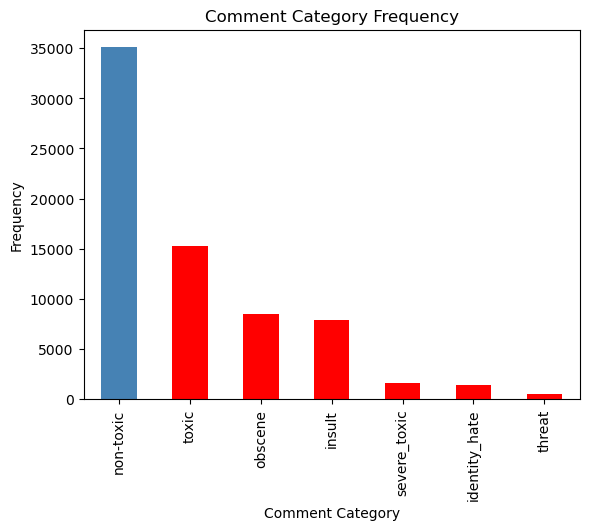

In [9]:
# Create a subset for comment categories in training data
categories = train_df[['toxic', 'severe_toxic', 'obscene', 'threat', 'insult', 'identity_hate']]

# Calculating comment category counts
category_count = categories.sum()

# Calculate the count of non-toxic comments
non_toxic_count = category_count.sum()-len(category_count) 

# Concatenate non-toxic count to the label count series
category_count_with_non_toxic = pd.concat([category_count, pd.Series({'non-toxic': non_toxic_count})])

# Sorting label counts in descending order
category_count_sorted = category_count_with_non_toxic.sort_values(ascending=False)

# Define colors for the bars
colors = ['steelblue' if category == 'non-toxic' else 'red' for category in category_count_sorted.index]

# Plot sentiment frequencies
category_count_sorted.plot(kind='bar', title='Comment Category Frequency', color=colors)
plt.xlabel('Comment Category')
plt.ylabel('Frequency')
plt.show()

##### The bar plot indicates that the majority of text comments in the training dataset are non-toxic. Among the categories of angry text comments, toxic comments are the most prevalent, while threat comments are the least common.

## Heatmap to visualize correlation between different angry text comments

In [ ]:
# Define the columns of for each toxic text comment
cols = ['toxic', 'severe_toxic', 'obscene', 'threat','insult', 'identity_hate']

# Visualizing the correlation between different categories of toxic comments
plt.figure(figsize=(9,9))
sns.heatmap(train_df[cols].corr(),annot=True,cmap=plt.cm.plasma,linewidths=2,linecolor='white',square=True)

## Tokenization and Vectorization

In [10]:
# Define function to tokenize and preprocess comment
def tokenize(comment):
    # Convert text to lowercase
    comment = comment.lower() if isinstance (comment, str) else ""


    # Remove punctuation
    comment = ''.join([char for char in comment if char not in string.punctuation])


    # Remove stopwords
    stop_words = set(stopwords.words('english'))
    tokens = comment.split()
    tokens = [token for token in tokens if token not in stop_words]
    comment = ' '.join(tokens)


    # Strip leading and trailing whitespace
    comment = comment.strip()


    return comment

In [11]:
# Display the comment text in training data after tokenization
train_df['comment_text'] = train_df['comment_text'].apply(lambda comment: tokenize(comment))
train_df['comment_text'][:5]

0    explanation edits made username hardcore metal...
1    daww matches background colour im seemingly st...
2    hey man im really trying edit war guy constant...
3    cant make real suggestions improvement wondere...
4                  sir hero chance remember page thats
Name: comment_text, dtype: object

In [12]:
# Display the comment text in testing data after tokenization
test_df['comment_text'] = test_df['comment_text'].apply(lambda comment: tokenize(comment))
test_df['comment_text'][:5]

0    yo bitch ja rule succesful youll ever whats ha...
1                                   rfc title fine imo
2                        sources zawe ashton lapland —
3    look back source information updated correct f...
4                       dont anonymously edit articles
Name: comment_text, dtype: object

In [13]:
# Define a function to remove non-printable characters
def remove_nonprintable(text):
    return ''.join(c for c in text if c in string.printable)

# Apply the function to clean
train_df['comment_text'] = train_df['comment_text'].apply(remove_nonprintable)

In [14]:
""" Create TF-IDF Vectorizer 
    Remove common English stop words, limit the number of features to top 5000 most frequent words, strip accents
    Consider unigrams, bigrams, trigrams"""
vector = TfidfVectorizer(stop_words='english',max_features=5000,strip_accents ='unicode',ngram_range=(1,3))

X_train = vector.fit_transform(train_df['comment_text'])
X_test = vector.transform(test_df['comment_text'])


In [15]:
train_df.head()

,id,comment_text,toxic,severe_toxic,obscene,threat,insult,identity_hate
0,0000997932d777bf,explanation edits made username hardcore metal...,0,0,0,0,0,0
1,000103f0d9cfb60f,daww matches background colour im seemingly st...,0,0,0,0,0,0
2,000113f07ec002fd,hey man im really trying edit war guy constant...,0,0,0,0,0,0
3,0001b41b1c6bb37e,cant make real suggestions improvement wondere...,0,0,0,0,0,0
4,0001d958c54c6e35,sir hero chance remember page thats,0,0,0,0,0,0


## Model Creation and Training

In [16]:
y_train = train_df[['toxic', 'severe_toxic', 'obscene', 'threat', 'insult', 'identity_hate']]

Model: Logistic Regression
              precision    recall  f1-score   support

           0       0.90      0.60      0.72      3056
           1       0.55      0.24      0.34       321
           2       0.91      0.63      0.74      1715
           3       0.62      0.14      0.22        74
           4       0.83      0.50      0.63      1614
           5       0.77      0.16      0.26       294

   micro avg       0.87      0.55      0.67      7074
   macro avg       0.76      0.38      0.49      7074
weighted avg       0.86      0.55      0.66      7074
 samples avg       0.05      0.05      0.05      7074



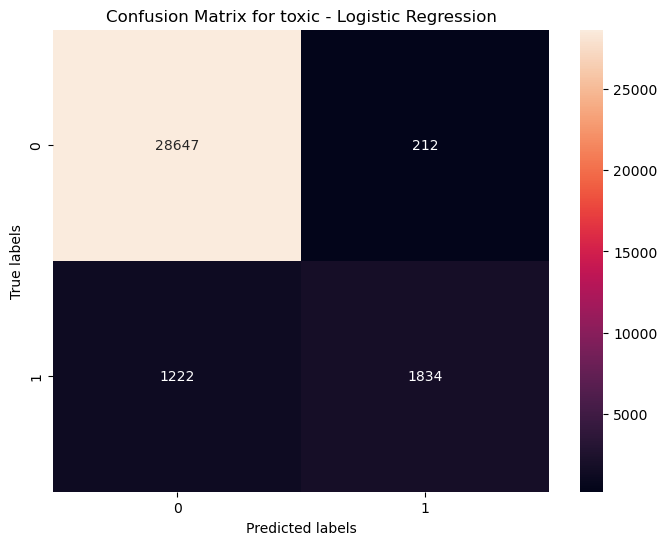

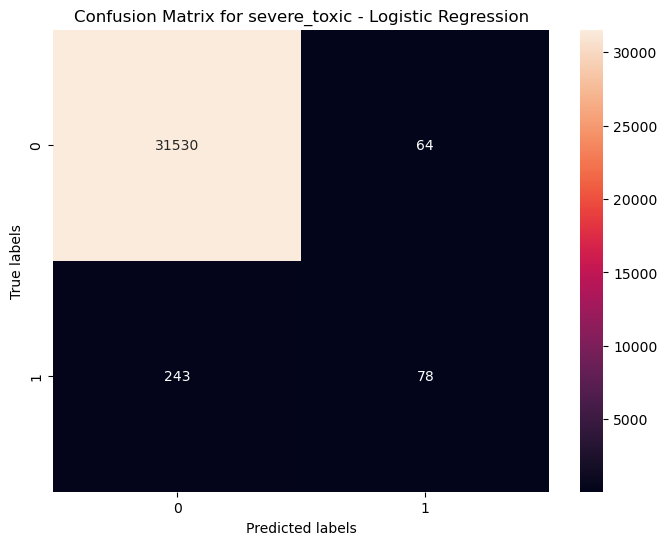

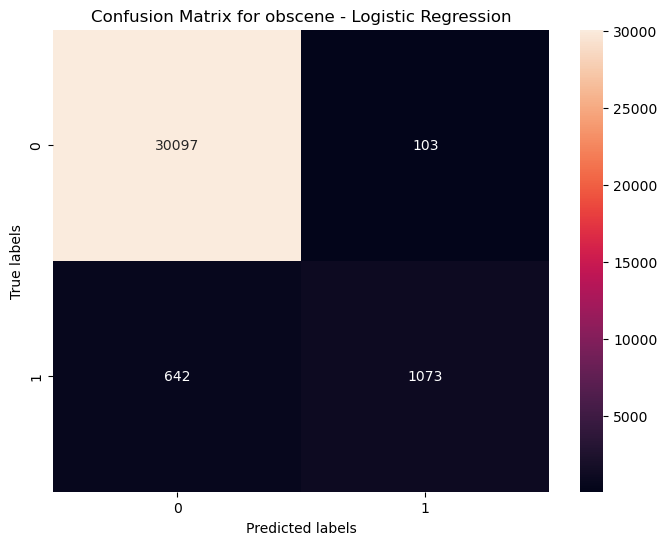

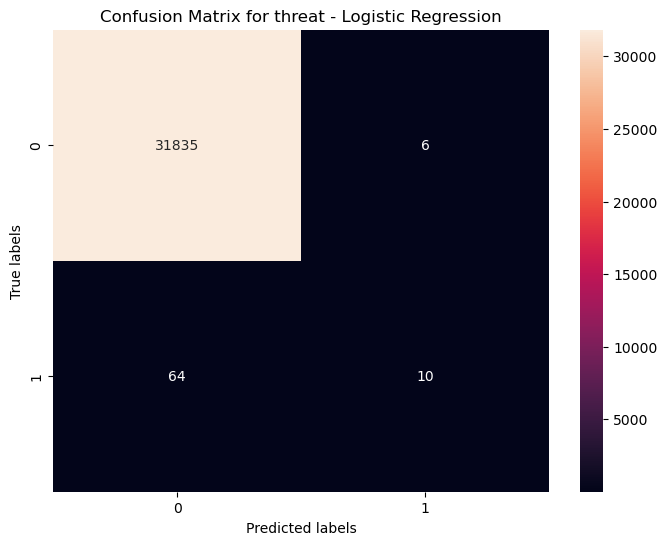

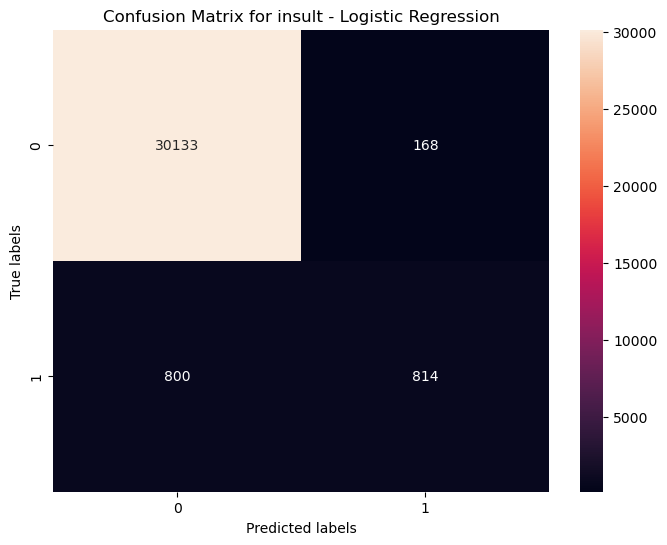

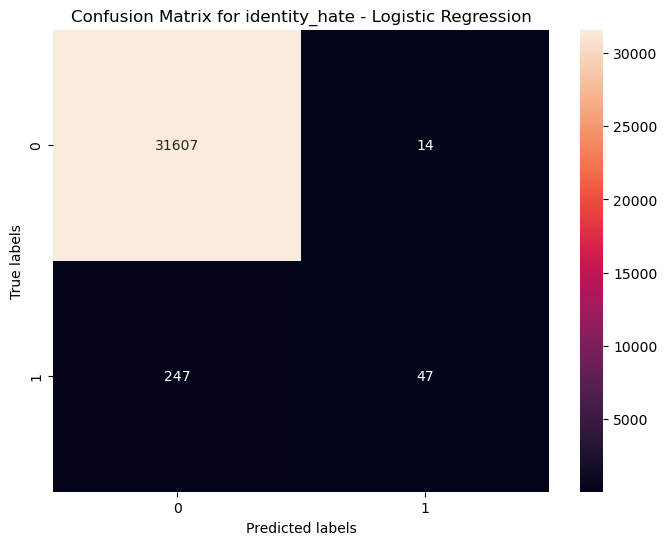

Model: Naive Bayes
              precision    recall  f1-score   support

           0       0.92      0.52      0.66      3056
           1       0.48      0.22      0.30       321
           2       0.90      0.52      0.66      1715
           3       0.00      0.00      0.00        74
           4       0.81      0.43      0.57      1614
           5       0.45      0.10      0.17       294

   micro avg       0.85      0.46      0.60      7074
   macro avg       0.59      0.30      0.39      7074
weighted avg       0.84      0.46      0.59      7074
 samples avg       0.05      0.04      0.04      7074



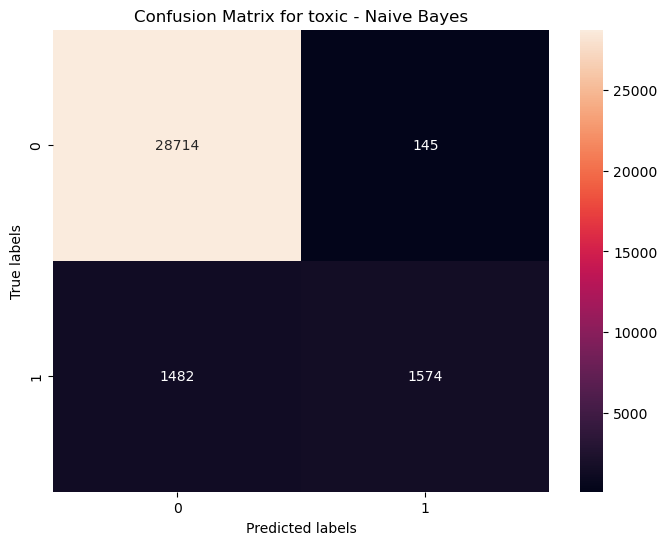

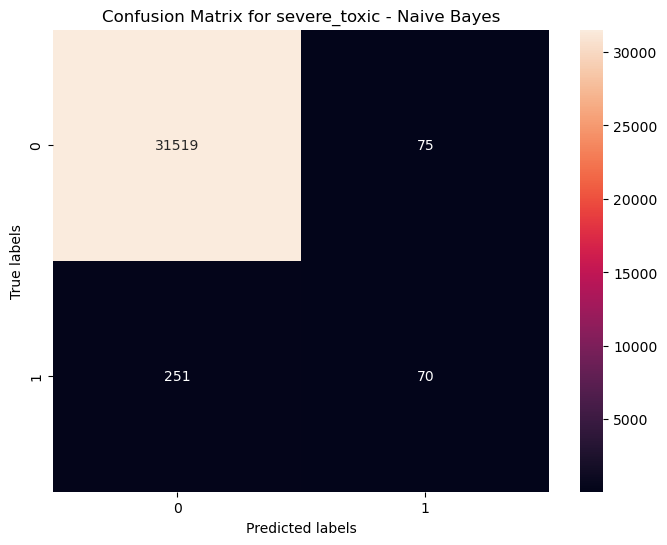

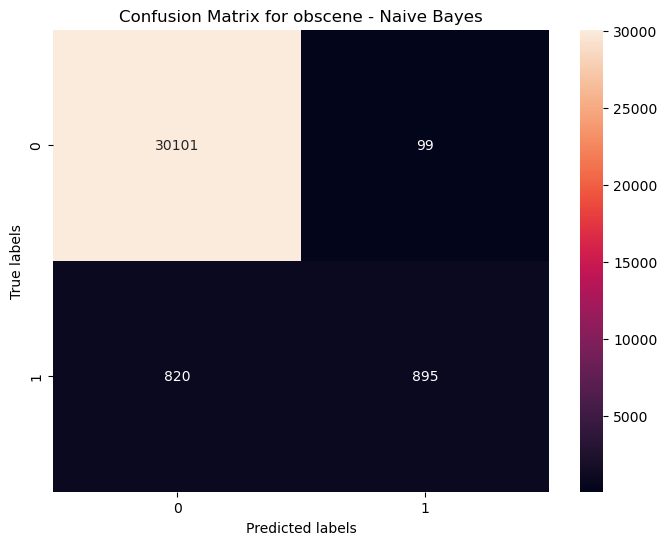

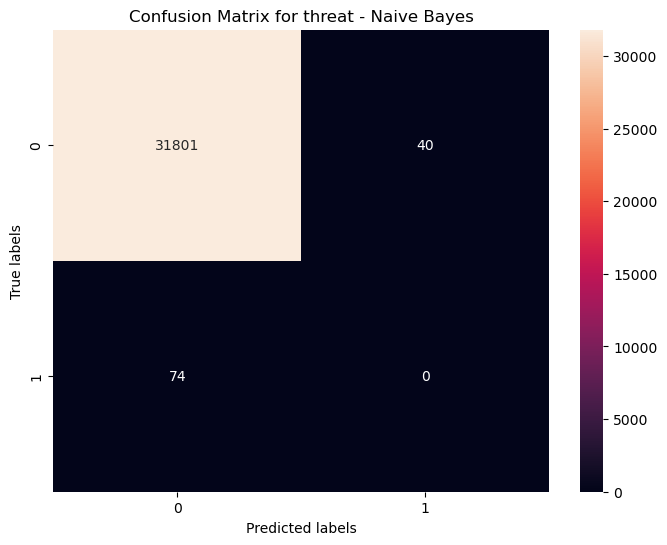

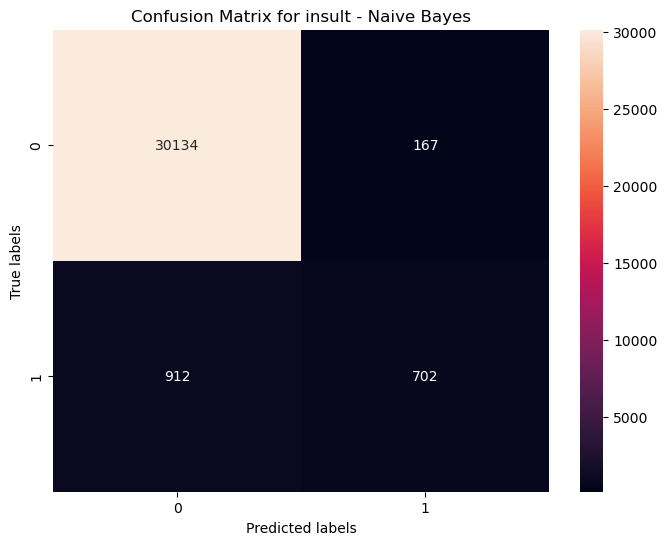

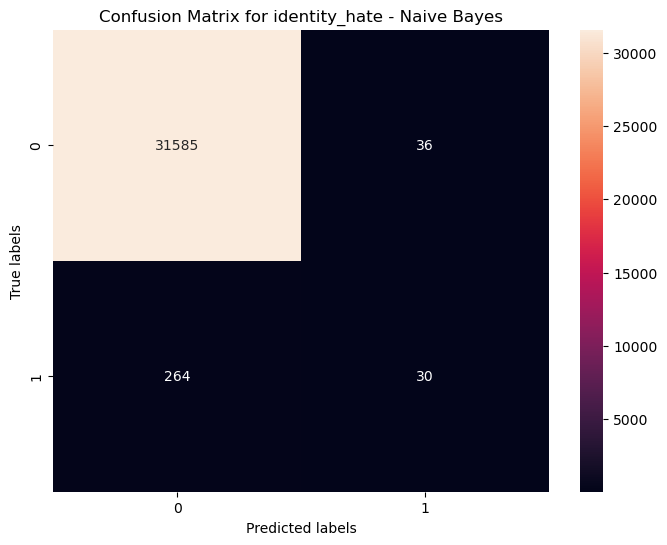

Model: Random Forest
              precision    recall  f1-score   support

           0       0.84      0.64      0.73      3056
           1       0.53      0.08      0.14       321
           2       0.85      0.71      0.77      1715
           3       0.67      0.11      0.19        74
           4       0.74      0.58      0.65      1614
           5       0.65      0.11      0.19       294

   micro avg       0.81      0.59      0.69      7074
   macro avg       0.71      0.37      0.44      7074
weighted avg       0.79      0.59      0.67      7074
 samples avg       0.06      0.05      0.05      7074



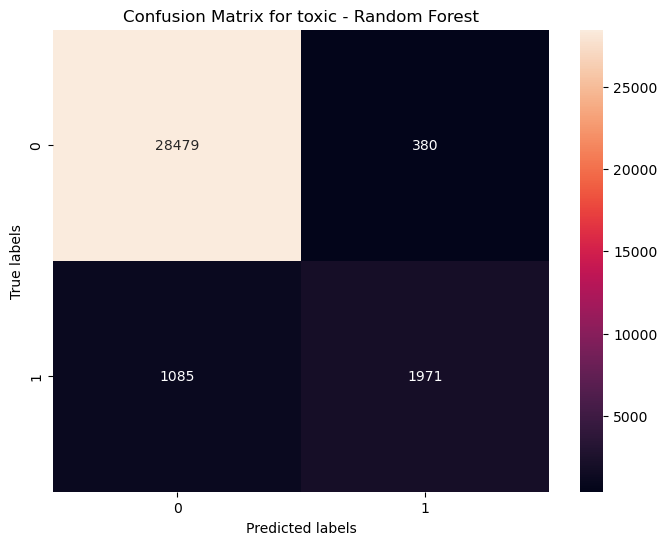

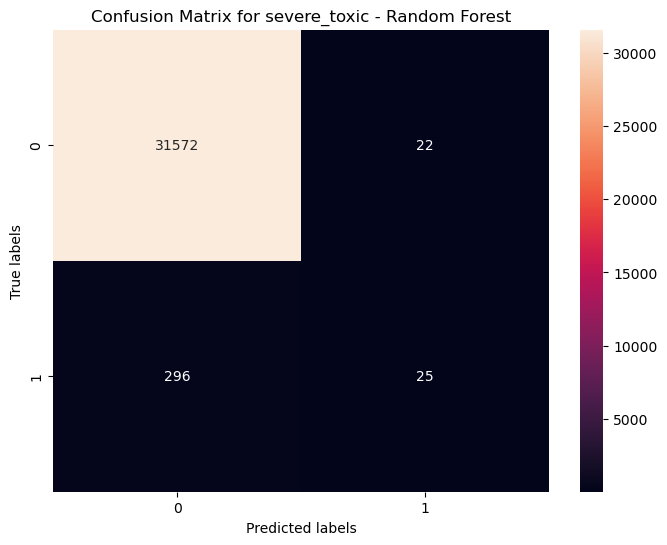

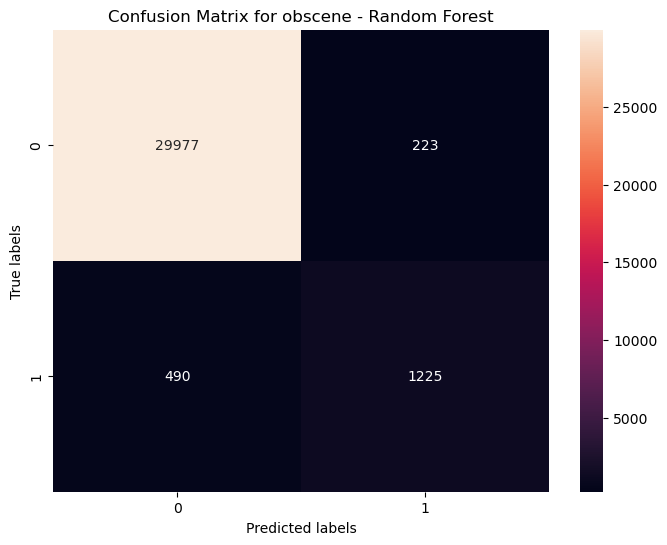

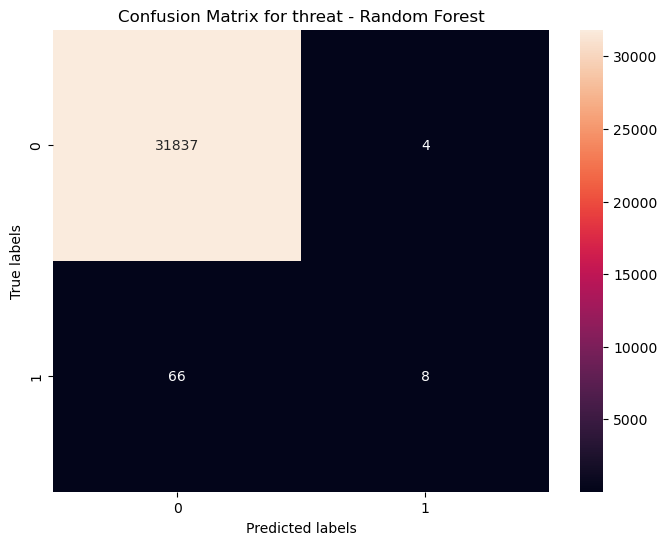

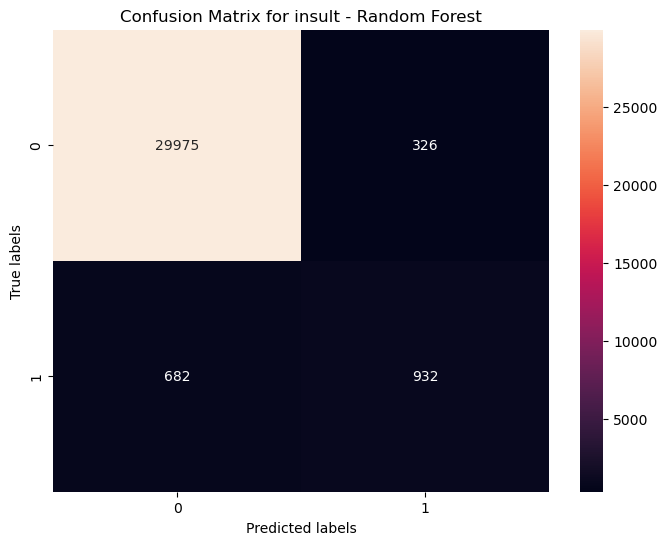

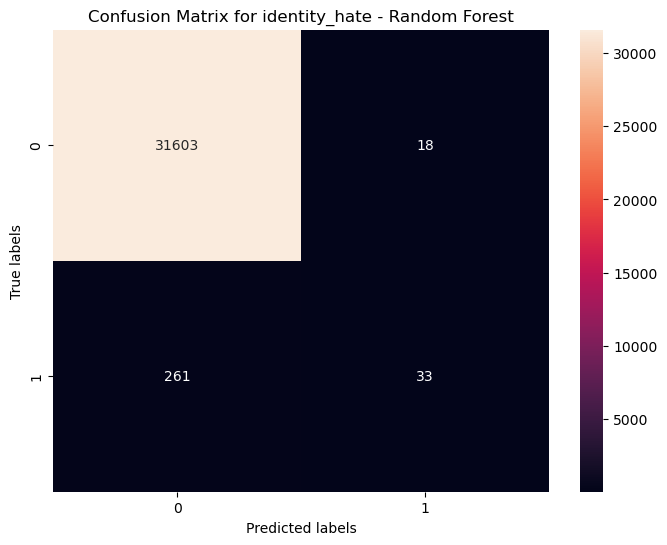

Model: SVM
              precision    recall  f1-score   support

           0       0.88      0.64      0.74      3056
           1       0.53      0.20      0.29       321
           2       0.89      0.67      0.77      1715
           3       0.52      0.18      0.26        74
           4       0.80      0.54      0.65      1614
           5       0.66      0.23      0.34       294

   micro avg       0.85      0.58      0.69      7074
   macro avg       0.71      0.41      0.51      7074
weighted avg       0.84      0.58      0.68      7074
 samples avg       0.06      0.05      0.05      7074



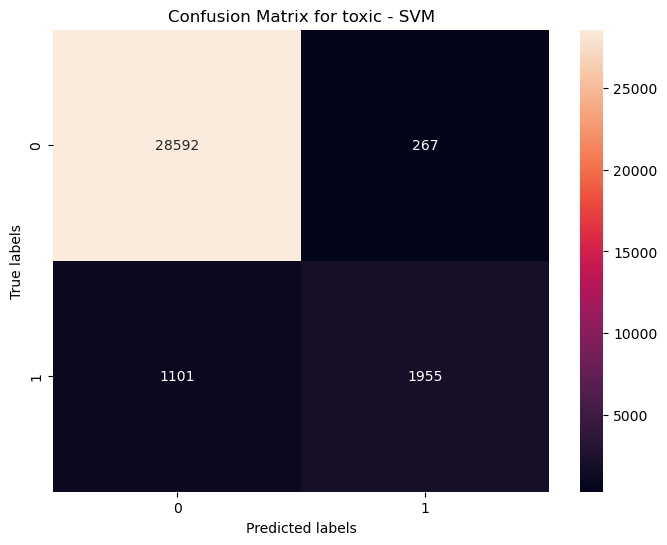

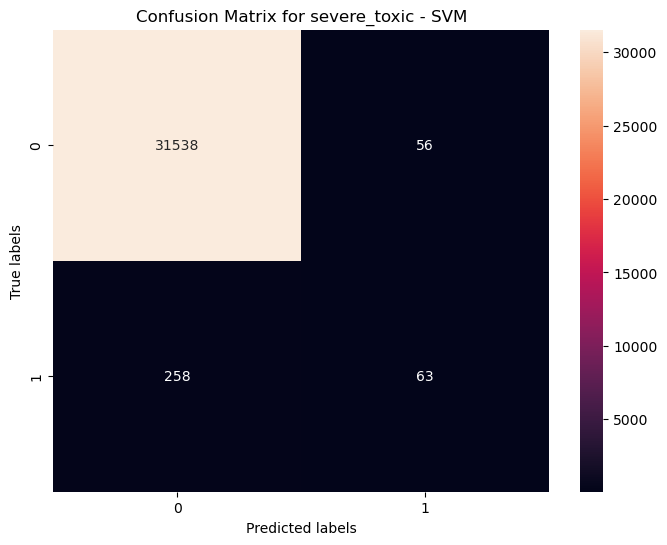

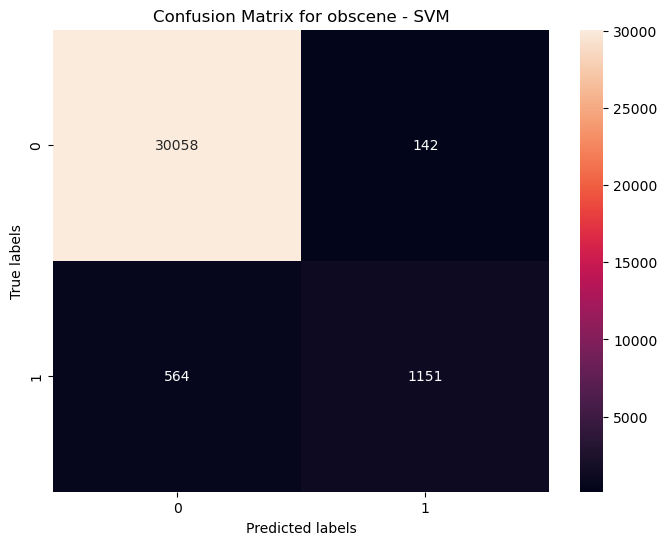

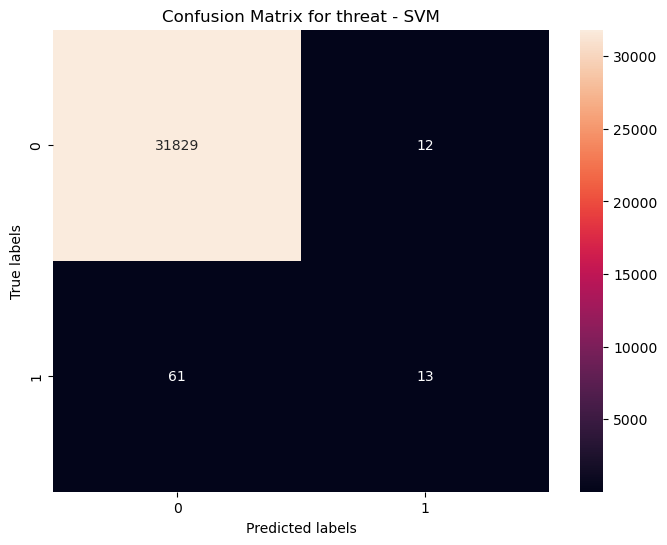

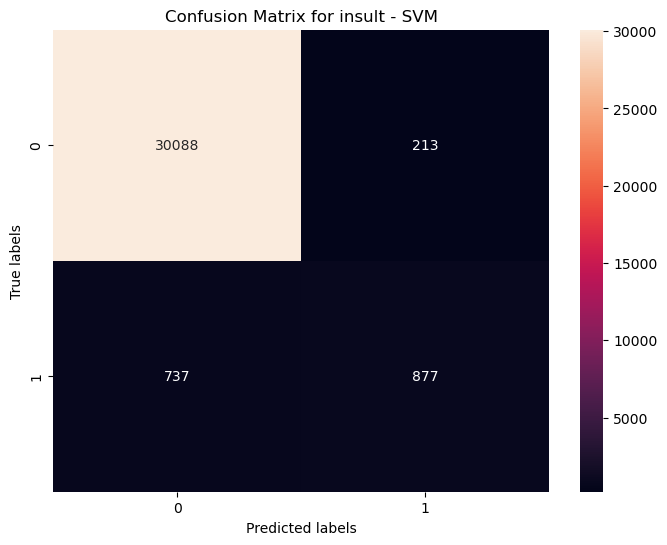

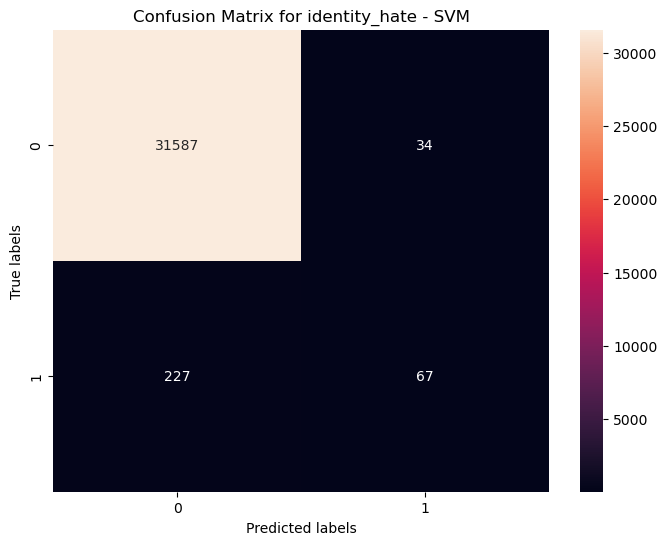

In [17]:
# Define the models
models = {
    'Logistic Regression': LogisticRegression(solver='liblinear'),
    'Naive Bayes': MultinomialNB(),
    'Random Forest': RandomForestClassifier(n_estimators=100, random_state=42, n_jobs=-1),
    'SVM': LinearSVC(dual=False, max_iter=1000)
}

# Spliting the data
X_train_split, X_val_split, y_train_split, y_val_split = train_test_split(X_train, y_train, test_size=0.2, random_state=42)

# Training and evalutating each model
for model_name, model in models.items():
    # Creating OneVsRestClassifier
    clf = OneVsRestClassifier(model)
    
    # Train
    clf.fit(X_train_split, y_train_split)
    
    # Predict 
    y_val_pred = clf.predict(X_val_split)
    
    # Printing the classification report
    print(f"Model: {model_name}")
    print(classification_report(y_val_split, y_val_pred, zero_division=0))
    
    # Plotting the confusion matrix
    for i, label in enumerate(y_train.columns):
        plt.figure(figsize=(8, 6))
        sns.heatmap(confusion_matrix(y_val_split.iloc[:, i], y_val_pred[:, i]), annot=True, fmt='d')
        plt.title(f"Confusion Matrix for {label} - {model_name}")
        plt.xlabel('Predicted labels')
        plt.ylabel('True labels')
        plt.show()

In [18]:
# Create a dataframe to group and compare the scores

test_stats = pd.DataFrame(columns=['Test Type', 'Category', 'Precision', 'Recall', 'F-Score'])
test_stats.loc[len(test_stats)] = ['Logistic',	0,	90.00,	60.00,	72.00]
test_stats.loc[len(test_stats)] = ['Logistic',	1,	55.00,	24.00,	34.00]
test_stats.loc[len(test_stats)] = ['Logistic',	2,	91.00,	63.00,	74.00]
test_stats.loc[len(test_stats)] = ['Logistic',	3,	62.00,	14.00,	22.00]
test_stats.loc[len(test_stats)] = ['Logistic',	4,	83.00,	50.00,	63.00]
test_stats.loc[len(test_stats)] = ['Logistic',	5,	77.00,	16.00,	26.00]

test_stats.loc[len(test_stats)] = ['Naive',	0,	92.00,	52.00,	66.00]
test_stats.loc[len(test_stats)] = ['Naive',	1,	48.00,	22.00,	30.00]
test_stats.loc[len(test_stats)] = ['Naive',	2,	90.00,	52.00,	66.00]
test_stats.loc[len(test_stats)] = ['Naive',	3,	0.00,	0.00,	0.00]
test_stats.loc[len(test_stats)] = ['Naive',	4,	81.00,	43.00,	57.00]
test_stats.loc[len(test_stats)] = ['Naive',	5,	45.00,	10.00,	17.00]

test_stats.loc[len(test_stats)] = ['Random Forest',	0,	84.00,	64.00,	73.00]
test_stats.loc[len(test_stats)] = ['Random Forest',	1,	53.00,	8.00,	14.00]
test_stats.loc[len(test_stats)] = ['Random Forest',	2,	85.00,	71.00,	77.00]
test_stats.loc[len(test_stats)] = ['Random Forest',	3,	67.00,	11.00,	19.00]
test_stats.loc[len(test_stats)] = ['Random Forest',	4,	74.00,	58.00,	65.00]
test_stats.loc[len(test_stats)] = ['Random Forest',	5,	65.00,	11.00,	19.00]

test_stats.loc[len(test_stats)] = ['SVM',	0,	88.00,	64.00,	74.00]
test_stats.loc[len(test_stats)] = ['SVM',	1,	53.00,	20.00,	29.00]
test_stats.loc[len(test_stats)] = ['SVM',	2,	89.00,	67.00,	77.00]
test_stats.loc[len(test_stats)] = ['SVM',	3,	52.00,	18.00,	26.00]
test_stats.loc[len(test_stats)] = ['SVM',	4,	80.00,	54.00,	65.00]
test_stats.loc[len(test_stats)] = ['SVM',	5,	66.00,	23.00,	34.00]


In [84]:
# Display the scores

for i in range(6):
    x = max(test_stats['Precision'][test_stats['Category']==i]) 
    y = max(test_stats['Recall'][test_stats['Category']==i]) 
    z = max(test_stats['F-Score'][test_stats['Category']==i])
    print(i, x, y, z)



0 92.0 64.0 74.0
1 55.0 24.0 34.0
2 91.0 71.0 77.0
3 67.0 18.0 26.0
4 83.0 58.0 65.0
5 77.0 23.0 34.0


##### Going off of the scores of the different tests for each category, I'll be going with :
##### - SVC for Toxic 
##### - Logistic Regression for Severe toxic 
##### - Random forest for obscene 
##### - SVC for threat 
##### - Random Forest for insult
##### - SVC for identity hate. 

## Preparing test_df. Much of this is dircetly copied from the initial model creation step with the dataframe swapped out for test_df

In [21]:
# Create a dict for renaming
name_dict = {2:'toxic', 3:'severe_toxic', 4:'obscene', 5:'threat', 6:'insult', 7:'identity_hate'}

# Add empty columns to the dataframe
test_df[2] = 0
test_df[3] = 0
test_df[4] = 0
test_df[5] = 0
test_df[6] = 0
test_df[7] = 0
test_df = test_df.rename(columns=name_dict)

test_df.head()

,id,comment_text,toxic,severe_toxic,obscene,threat,insult,identity_hate,toxic,severe_toxic,obscene,threat,insult,identity_hate,toxic,severe_toxic,obscene,threat,insult,identity_hate
0,1,yo bitch ja rule succesful youll ever whats ha...,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0
1,2,rfc title fine imo,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0
2,3,sources zawe ashton lapland —,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0
3,4,look back source information updated correct f...,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0
4,5,dont anonymously edit articles,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0


In [22]:
# Create a subset for comment categories in training data
categories = test_df[['toxic', 'severe_toxic', 'obscene', 'threat', 'insult', 'identity_hate']]

# Calculating comment category counts
category_count = categories.sum()

# Calculate the count of non-toxic comments
non_toxic_count = category_count.sum()-len(category_count) 

# Concatenate non-toxic count to the label count series
category_count_with_non_toxic = pd.concat([category_count, pd.Series({'non-toxic': non_toxic_count})])

# Sorting label counts in descending order
category_count_sorted = category_count_with_non_toxic.sort_values(ascending=False)


In [23]:
# Display the comment text in training data after tokenization
test_df['comment_text'] = test_df['comment_text'].apply(lambda comment: tokenize(comment))
test_df['comment_text'][:5]

0    yo bitch ja rule succesful youll ever whats ha...
1                                   rfc title fine imo
2                        sources zawe ashton lapland —
3    look back source information updated correct f...
4                       dont anonymously edit articles
Name: comment_text, dtype: object

In [24]:
# Apply the function to clean
test_df['comment_text'] = test_df['comment_text'].apply(remove_nonprintable)

In [28]:
""" Create TF-IDF Vectorizer 
    Remove common English stop words, limit the number of features to top 5000 most frequent words, strip accents
    Consider unigrams, bigrams, trigrams"""
vector = TfidfVectorizer(stop_words='english',max_features=5000,strip_accents ='unicode',ngram_range=(1,3))

x_train = vector.fit_transform(train_df['comment_text'])
x_test = vector.transform(test_df['comment_text'])

In [26]:
test_df.head()

,id,comment_text,toxic,severe_toxic,obscene,threat,insult,identity_hate,toxic,severe_toxic,obscene,threat,insult,identity_hate,toxic,severe_toxic,obscene,threat,insult,identity_hate
0,1,yo bitch ja rule succesful youll ever whats ha...,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0
1,2,rfc title fine imo,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0
2,3,sources zawe ashton lapland,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0
3,4,look back source information updated correct f...,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0
4,5,dont anonymously edit articles,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0


In [27]:
y_train = train_df[['toxic', 'severe_toxic', 'obscene', 'threat', 'insult', 'identity_hate']]

In [29]:
#create the final dataframe that will be used for the csv output. 
df_final = pd.DataFrame()

# Define the models
final_models = {
    'toxic': LinearSVC(dual=False, max_iter=1000),
    'severe_toxic': LogisticRegression(solver='liblinear'),
    'obscene': RandomForestClassifier(n_estimators=100, random_state=42, n_jobs=-1),
    'threat': LinearSVC(dual=False, max_iter=1000),
    'insult': RandomForestClassifier(n_estimators=100, random_state=42, n_jobs=-1),
    'identity_hate': LinearSVC(dual=False, max_iter=1000)
}

# Spliting the data
X_train_split, X_val_split, y_train_split, y_val_split = train_test_split(X_train, y_train, test_size=0.2, random_state=42)

# add in a counter for indexing
i = 0

# Training each model based on the decided on model and adding it to the final dataframe. 
# I didn't end up needing model_name, but I wasn't sure when I created the initial dict. 
for model_name, model in final_models.items():
    
    
    # Creating OneVsRestClassifier
    clf = OneVsRestClassifier(model)
    
    # Train
    clf.fit(X_train_split, y_train_split)
    
    # Predict 
    y_val_pred = clf.predict(x_test)
    
    df_temp = pd.DataFrame(y_val_pred)

    # adding to df_final.
    df_temp = pd.DataFrame(y_val_pred)

    df_final.insert(i, i, df_temp[i])
   
    i+=1



### The final dataframe has all of the highest scores from the 4 differnt models, picking the best method for each column of data.

### Final cells to create the .csv file. 

In [46]:
# Dict to rename the dataframe columns
name_dict_final = {'id':'id', 0:'toxic', 1:'severe_toxic', 2:'obscene', 3:'threat', 4:'insult', 5:'identity_hate'}

# Insert id and rename the columns 

### Commented out the insert to prevent an error as id is already in df_final. ### 
# df_final.insert(0, 'id', test_df['id'])

# Rename the columns 
sample_out = df_final.rename(columns = name_dict_final)

# Output the final csv
sample_out.to_csv('out.csv', index=False)  

sample_out.head()


,toxic,severe_toxic,obscene,threat,insult,identity_hate
0,0,0,0,0,0,0
1,0,0,0,0,0,0
2,0,0,0,0,0,0
3,0,0,1,0,0,0
4,0,0,0,0,0,0
